In [1]:
#Necessary imports for this code to run smoothly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
#Reading the data
df = pd.read_csv('Amreli NRM data for model building final.csv')

#Removing first heat from the analysis because previous induction furnace parameters are inputs for this model
df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)

#Missing values for capacitors replaced with 0
df['Number of capacitors removed'].fillna(0, inplace=True)

#Threshold for total heat time
threshold = 150

for i in range(df.shape[0]):
    if(df.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df.loc[i,'Total Heat Time (minutes)']>threshold):
        df.loc[i,'Total Heat Time (minutes)']= threshold
        
#Units conversion 
df['Input energy previous (KWH)'] = df['Power previous']*df['Total Heat Time previous (minutes)']/60
df['Input energy (KWH)'] = df['Power']*df['Total Heat Time (minutes)']/60

In [4]:
#Units conversion 
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [5]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

#Taking first 7 campaigns as training data and last 2 camapaigns as testing data
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

#Normalization
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [6]:
# ## Keras NN
# ## model = Sequential()
# n_input = X_train.shape[1] # number of features
# n_hidden_1 = 500
# n_hidden_2 = 100
# n_hidden_3 = 50
# n_hidden_4 = 150
# n_hidden_5 = 100
# n_hidden_6 = 50
# n_hidden_7 = 25
# num_digits = 1
# n_output = 1

# Inp = Input(shape=(n_input,))
# x = Dense(n_hidden_1, activation='relu')(Inp)
# x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
# x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# # x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# # x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# # x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# # x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

# output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
# model = Model(Inp, output)
# model.summary() 
# learning_rate = 0.001
# training_epochs = 50
# batch_size = 5
# # sgd = optimizers.SGD(lr=learning_rate)
# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                   optimizer='adam',
#                   metrics=['mse'])
    
# model.fit(normalized_X_train, normalized_y_train,
#                          batch_size = batch_size,
#                          epochs = training_epochs,
#                          verbose = 2)


# pred_train = model.predict(normalized_X_train)
# y_pred_train = scaler2.inverse_transform(pred_train)
# pred_test = model.predict(normalized_X_test)
# y_pred_test = scaler2.inverse_transform(pred_test)

In [7]:
#Neural Net model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
n_hidden_1 = 500
n_hidden_2 = 500
n_hidden_3 = 500
n_input = X_train.shape[1] 
n_output = 1
model = Sequential()
model.add(Dense(n_hidden_1, input_dim=n_input, activation='relu'))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_3, activation='relu'))
model.add(Dense(n_output, activation='relu'))
# compile the keras model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
model.fit(normalized_X_train, normalized_y_train, epochs=500, batch_size=5, verbose=2)
# make class predictions with the model

pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Train on 318 samples
Epoch 1/500
318/318 - 1s - loss: 0.0092 - mse: 0.0092
Epoch 2/500
318/318 - 0s - loss: 0.0045 - mse: 0.0045
Epoch 3/500
318/318 - 0s - loss: 0.0042 - mse: 0.0042
Epoch 4/500
318/318 - 0s - loss: 0.0043 - mse: 0.0043
Epoch 5/500
318/318 - 0s - loss: 0.0034 - mse: 0.0034
Epoch 6/500
318/318 - 0s - loss: 0.0034 - mse: 0.0034
Epoch 7/500
318/318 - 0s - loss: 0.0040 - mse: 0.0040
Epoch 8/500
318/318 - 0s - loss: 0.0037 - mse: 0.0037
Epoch 9/500
318/318 - 0s - loss: 0.0038 - mse: 0.0038
Epoch 10/500
318/318 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 11/500
318/318 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 12/500
318/318 - 0s - loss: 0.0035 - mse: 0.0035
Epoch 13/500
318/318 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 14/500
318/318 - 0s - loss: 0.0036 - mse: 0.0036
Epoch 15/500
318/318 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 16/500
318/318 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 17/500
318/318 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 18/500
318/318 - 0s - loss: 0.0036 - mse: 0.003

Epoch 149/500
318/318 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 150/500
318/318 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 151/500
318/318 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 152/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 153/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 154/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 155/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 156/500
318/318 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 157/500
318/318 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 158/500
318/318 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 159/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 160/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 161/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 162/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 163/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 164/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 165/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 166/500
318/318 - 0s - loss: 0.0021 - mse:

Epoch 296/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 297/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 298/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 299/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 300/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 301/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 302/500
318/318 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 303/500
318/318 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 304/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 305/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 306/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 307/500
318/318 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 308/500
318/318 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 309/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 310/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 311/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 312/500
318/318 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 313/500
318/318 - 0s - loss: 0.0017 - mse:

Epoch 442/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 443/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 444/500
318/318 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 445/500
318/318 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 446/500
318/318 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 447/500
318/318 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 448/500
318/318 - 0s - loss: 9.8577e-04 - mse: 9.8577e-04
Epoch 449/500
318/318 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 450/500
318/318 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 451/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 452/500
318/318 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 453/500
318/318 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 454/500
318/318 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 455/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 456/500
318/318 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 457/500
318/318 - 0s - loss: 8.9954e-04 - mse: 8.9954e-04
Epoch 458/500
318/318 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 459/500
318/318 - 0s - los

In [8]:
#Metrics
num_digits=1
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.01094950280800307
Test score is 0.005880398194915369
R2 score is -0.43345499788005615
Train NMSE score is 38.51500481538636
Test NMSE score is 143.3454997880056


In [9]:
y_pred_test.shape

(122, 1)

In [10]:
#Metrics
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:62,i]-y_test[:62,i]))/np.sum(np.square(y_test[:62,i]-np.mean(y_test[:62,i])))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[62:,i]-y_test[62:,i]))/np.sum(np.square(y_test[62:,i]-np.mean(y_test[62:,i])))*100))

Test NMSE score is 113.76323562423896
Test NMSE score is 186.45509083218514


In [11]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

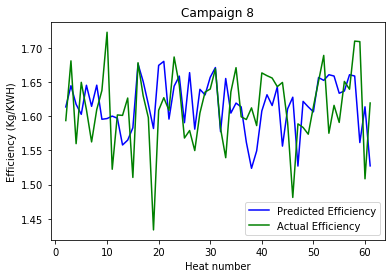

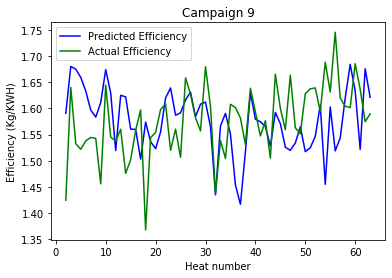

In [12]:
#Plots
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

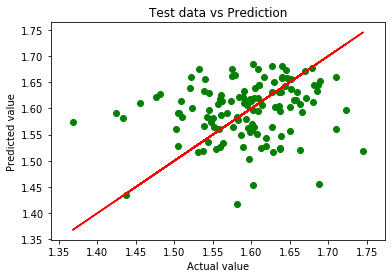

In [13]:
#Plots
plt.scatter(y_test, y_pred_test, c='g')
plt.plot(y_test,y_test,c='r')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Test data vs Prediction')
plt.show()

In [14]:
#Saving the model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
#Saving the scalers
from pickle import dump
dump(scaler1, open('scaler1.pkl', 'wb'))
dump(scaler2, open('scaler2.pkl', 'wb'))